In [1]:
import numpy as np
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

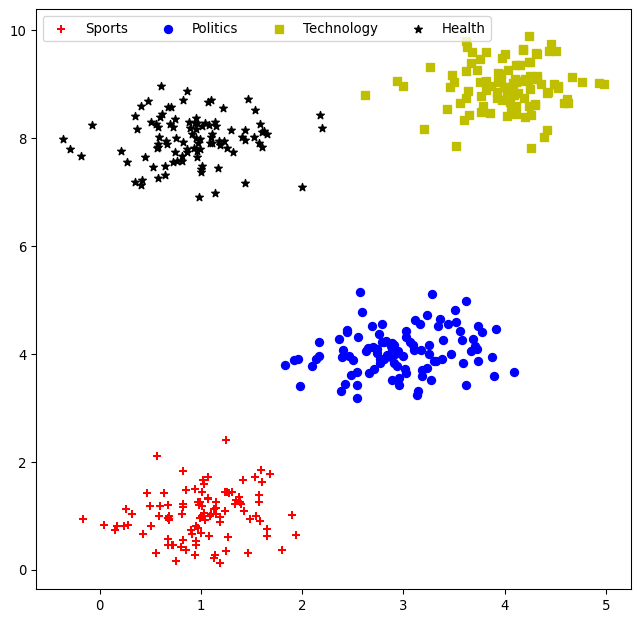

In [6]:


sigma = np.array([[0.2,0],[0,0.2]])
n = 100
mus = [ [1,1], [3,4], [4,9], [1,8] ]
markers = [ ['r','+'], ['b','o'], ['y','s'], ['k','*']]

X = None
y = np.zeros([4*n,1])

fig = plt.figure(num=None, figsize=(8, 8), 
                 dpi=96, facecolor='w', edgecolor='k')

for i, mu in enumerate(mus):
    cluster_x = np.random.multivariate_normal(np.array(mu),
                                              sigma,
                                              n)
    y[(i+1)*n:(i+2)*n] = i+1
    if X is not None:
        X = np.vstack([X,cluster_x])
    else:
        X = cluster_x

    plt.scatter(cluster_x[:,0],
                cluster_x[:,1],
                c=markers[i][0],
                marker=markers[i][1])


plt.legend(['Sports','Politics','Technology','Health'],ncol=4,loc=2)

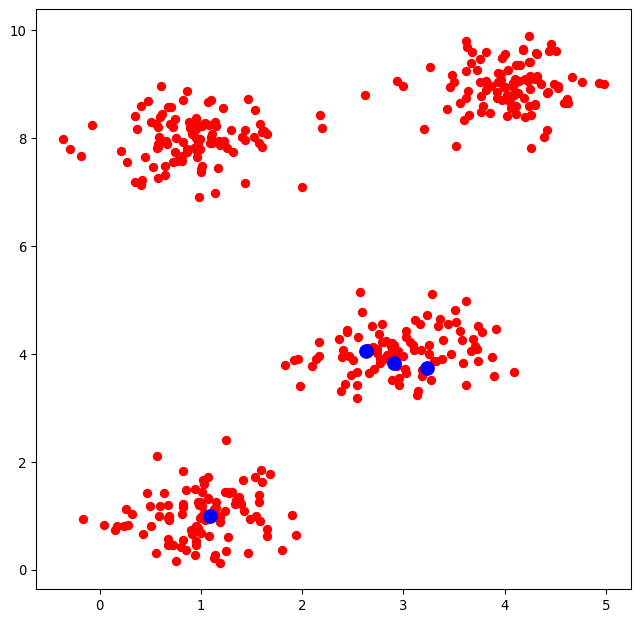

In [15]:
k = 4
r = np.random.permutation(X.shape[0])
init_centroids = X[r[0:k],:]
fig = plt.figure(num=None, figsize=(8, 8), dpi=96, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1],c='r')
plt.scatter(init_centroids[:,0],init_centroids[:,1],c='b',marker='o',s=100)


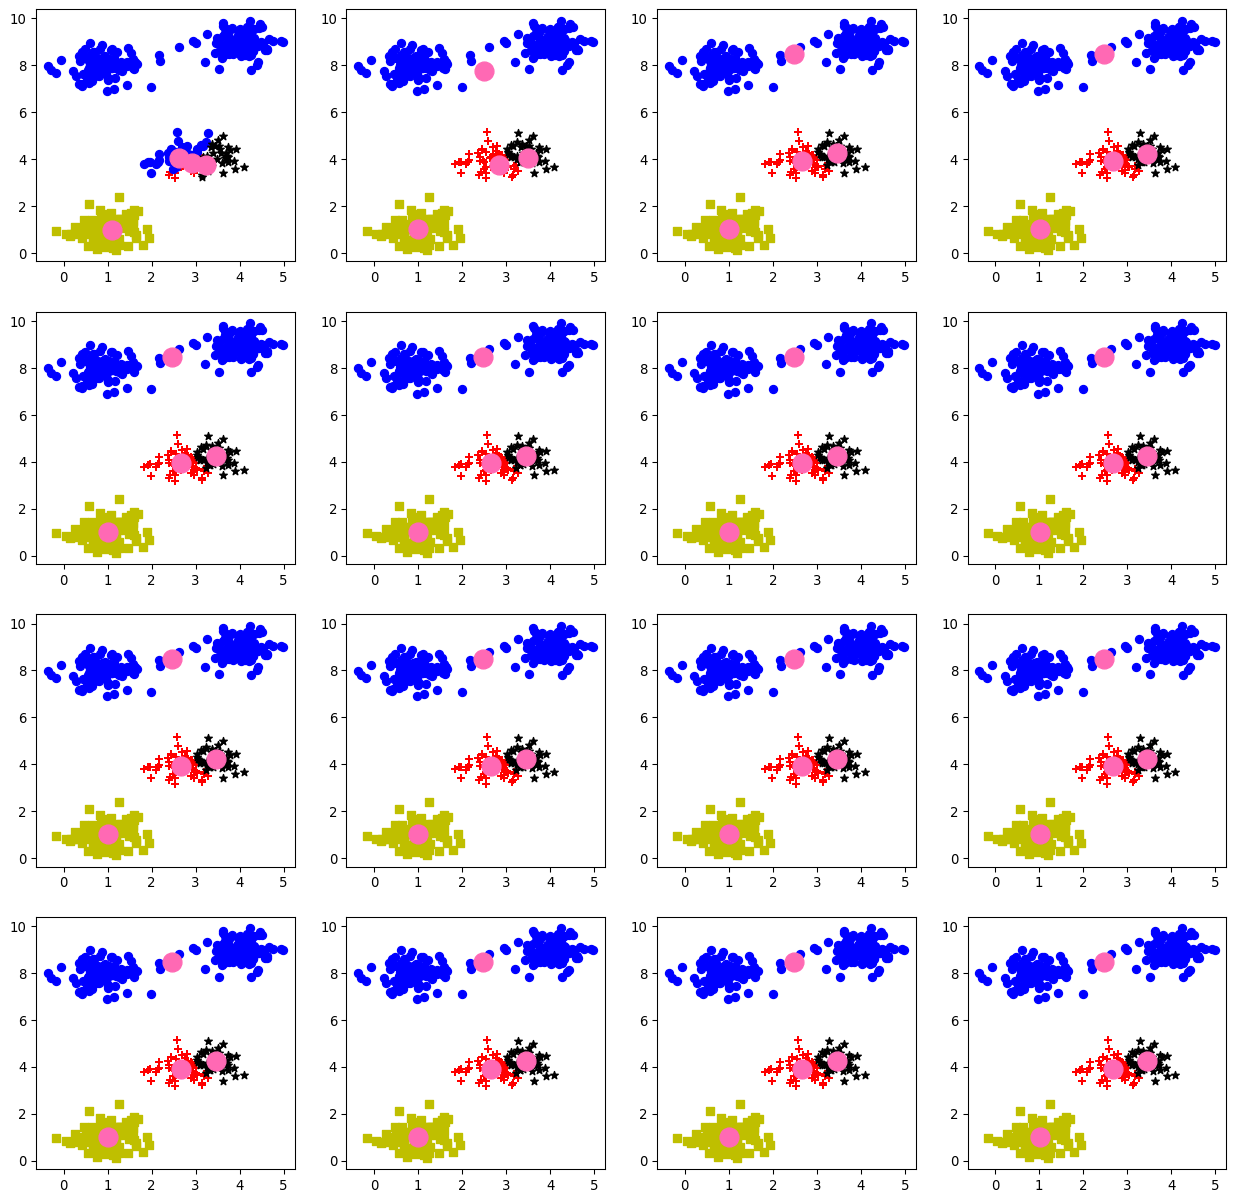

In [16]:
centroids = init_centroids
fig = plt.figure(num=None, figsize=(16, 16), dpi=96, facecolor='w', edgecolor='k')
for iters in range(16):
    distances = np.zeros((X.shape[0],k))
    for i in range(k):
        for j in range(X.shape[0]):
            distances[j,i] = np.sqrt(np.sum((X[j,:] - centroids[i,:])**2))
    assigned_cluster = np.argmin(distances,axis=1) 
    ax = fig.add_subplot(4,4,iters+1)

    for i in range(4):
        ax.scatter(X[np.where(assigned_cluster == i)[0],0],X[np.where(assigned_cluster == i)[0],1],
                c=markers[i][0],
                marker=markers[i][1])
    ax.scatter(centroids[:,0],centroids[:,1],c='hotpink',marker='o',s=200)

    # recompute centroids
    for i in range(k):
        centroids[i,:] = np.mean(X[np.where(assigned_cluster == i)[0],:],axis=0)